# Big Mart Sales report  : Training Phase

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
bm=pd.read_csv('bigdatamart_train.csv')
bm.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Missing Values

In [3]:
bm.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
bm.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
bm.shape

(8523, 12)

In [6]:
bm.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

# Remove missing values

In [7]:
bm['Item_Weight']=bm['Item_Weight'].replace(np.nan,bm['Item_Weight'].mean())

In [8]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')
bm['Outlet_Size']=imp.fit_transform(bm['Outlet_Size'].values.reshape(-1,1))

In [9]:
bm.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# Visualization

In [10]:
nominal=bm[['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Type','Outlet_Location_Type']].copy()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


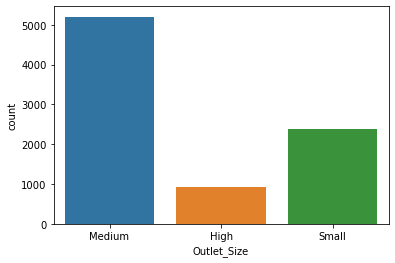

In [11]:
sns.countplot(x='Outlet_Size',data=nominal)
print(nominal['Outlet_Size'].value_counts())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


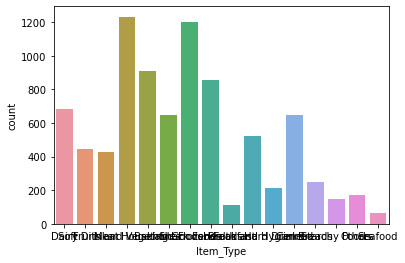

In [12]:
sns.countplot(x='Item_Type',data=nominal)
print(nominal['Item_Type'].value_counts())

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


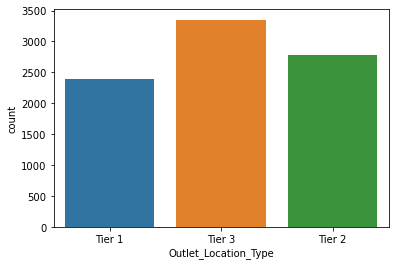

In [13]:
sns.countplot(x='Outlet_Location_Type',data=nominal)
print(nominal['Outlet_Location_Type'].value_counts())

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


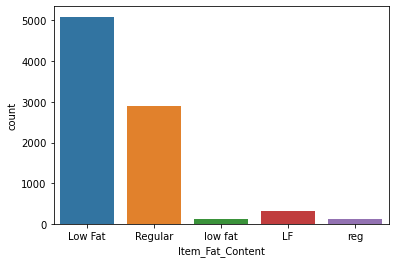

In [14]:
sns.countplot(x='Item_Fat_Content',data=nominal)
print(nominal['Item_Fat_Content'].value_counts())

In [15]:
ordinal=bm[['Item_Identifier','Outlet_Establishment_Year']].copy()

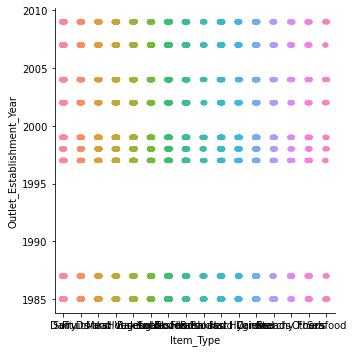

In [16]:
sns.catplot(x='Item_Type',y='Outlet_Establishment_Year',data=bm)

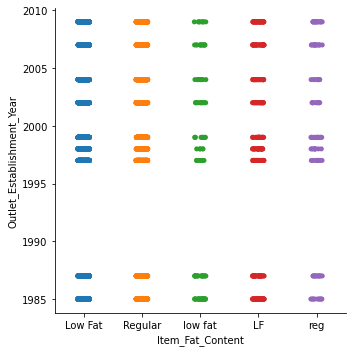

In [17]:
sns.catplot(x='Item_Fat_Content',y='Outlet_Establishment_Year',data=bm)

In [18]:
continuous=bm[['Item_Weight','Item_MRP','Item_Outlet_Sales']].copy()

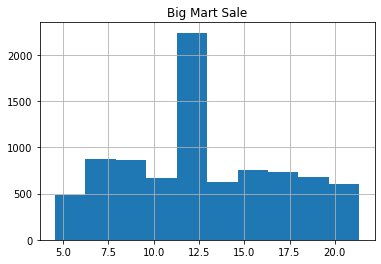

In [19]:
bm['Item_Weight'].hist(grid=True)                # Univariate analysis
plt.title('Big Mart Sale')
plt.show()

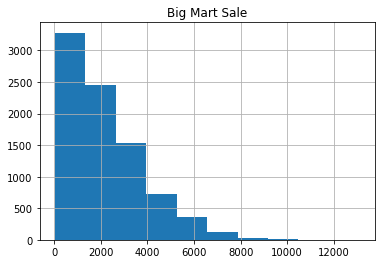

In [20]:
bm['Item_Outlet_Sales'].hist(grid=True)                # Univariate analysis
plt.title('Big Mart Sale')
plt.show()

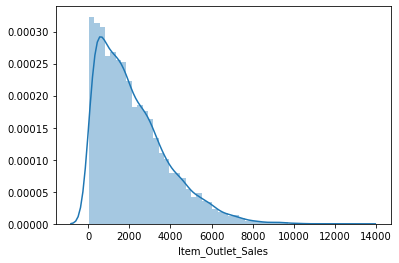

In [21]:
sns.distplot(continuous['Item_Outlet_Sales'],kde=True)

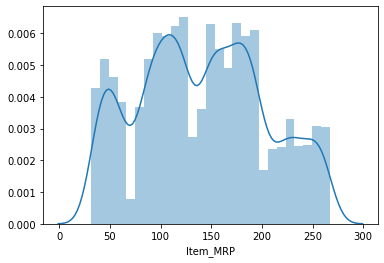

In [22]:
sns.distplot(continuous['Item_MRP'],kde=True)

# Ordinal Encoding

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [24]:
for i in bm.columns:
    if bm[i].dtype=="object":
        bm[i]=enc.fit_transform(bm[i].values.reshape(-1,1))

In [25]:
bm.dtypes

Item_Identifier              float64
Item_Weight                  float64
Item_Fat_Content             float64
Item_Visibility              float64
Item_Type                    float64
Item_MRP                     float64
Outlet_Identifier            float64
Outlet_Establishment_Year      int64
Outlet_Size                  float64
Outlet_Location_Type         float64
Outlet_Type                  float64
Item_Outlet_Sales            float64
dtype: object

# Describe Dataset

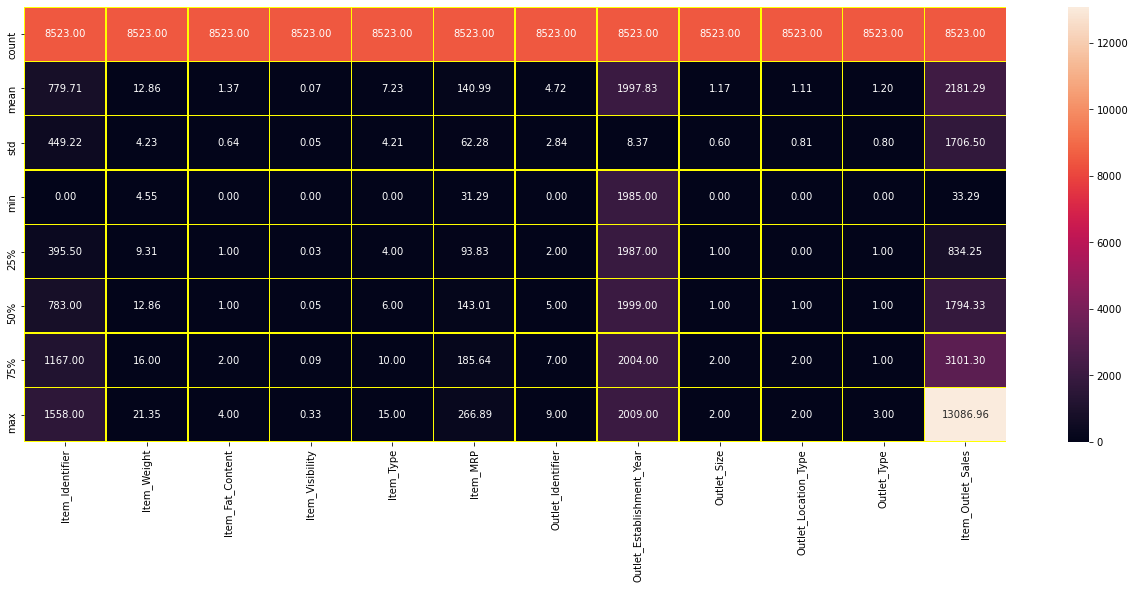

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,8))
sns.heatmap(bm.describe(),annot=True,linewidths=0.5,linecolor='yellow',fmt='0.2f')

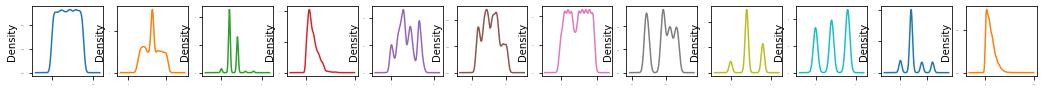

In [27]:
bm.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

# Correlation with Target Columns

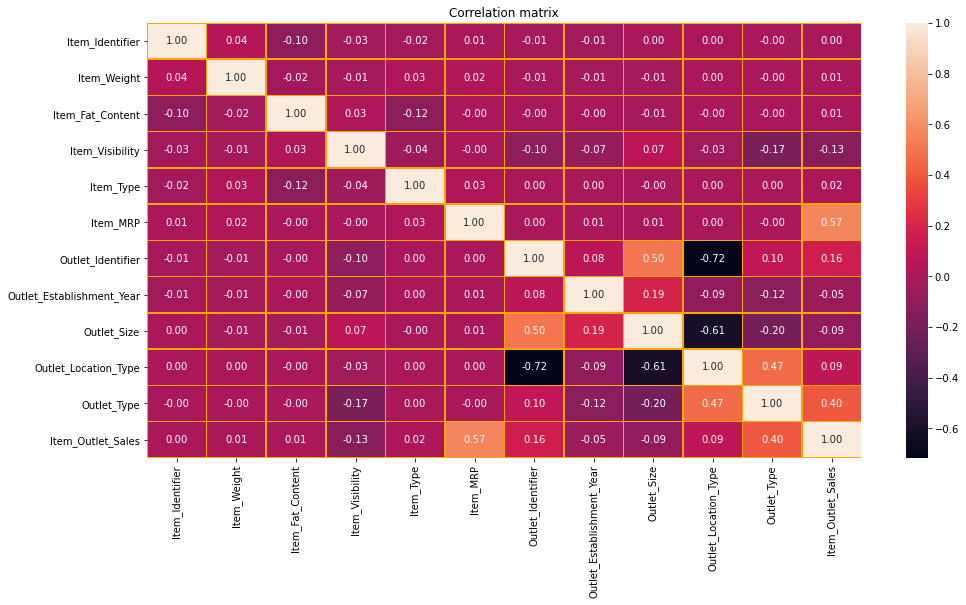

In [28]:
corr=bm.corr()                                               # multivariate analysis
plt.figure(figsize=(16,8))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

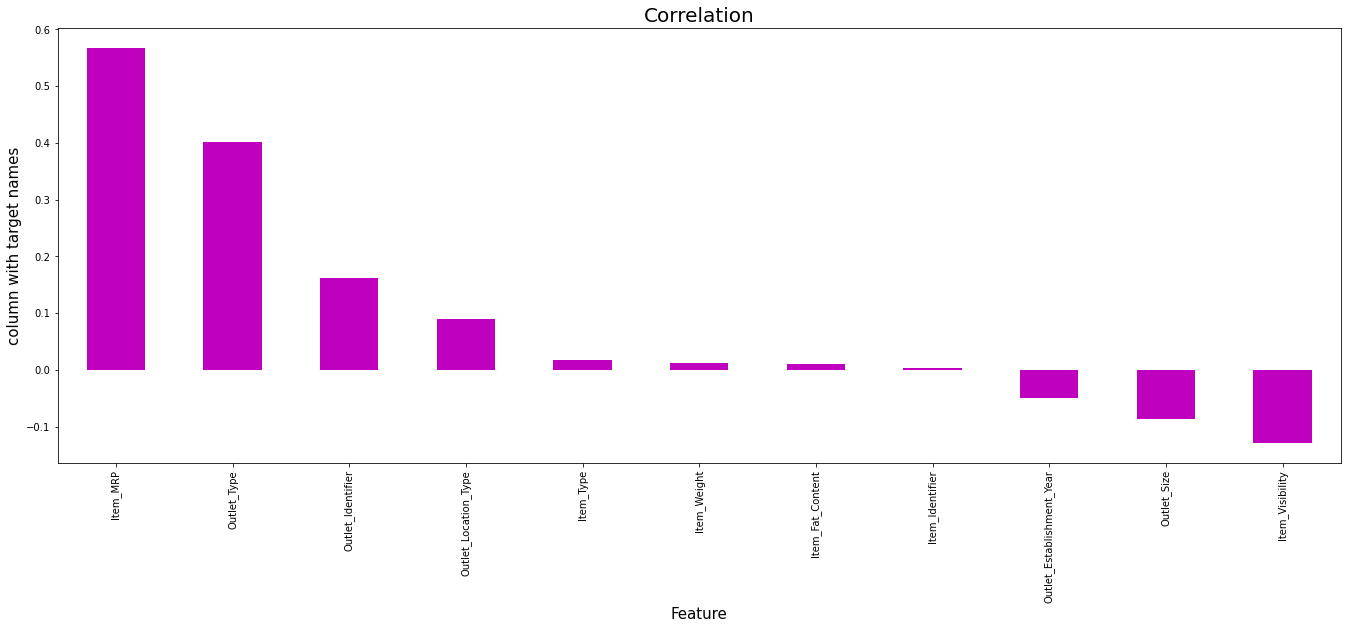

In [29]:
plt.figure(figsize=(23,8))
bm.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

# Skewness in Dataset

In [30]:
bm.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

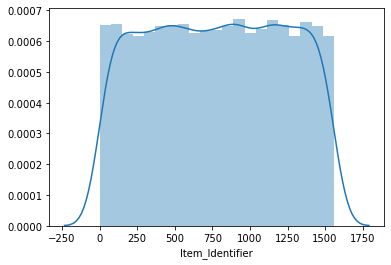

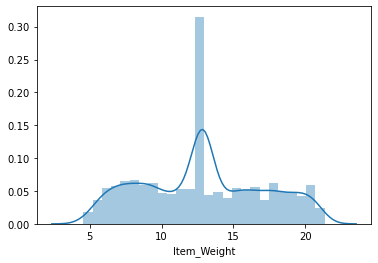

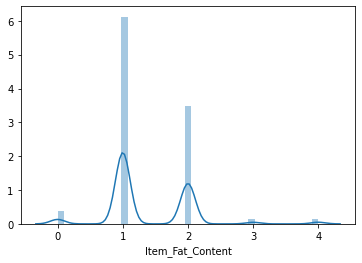

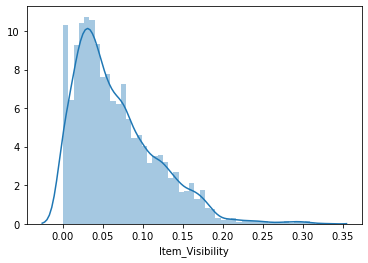

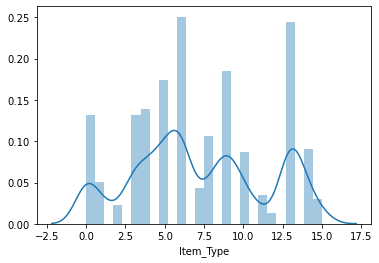

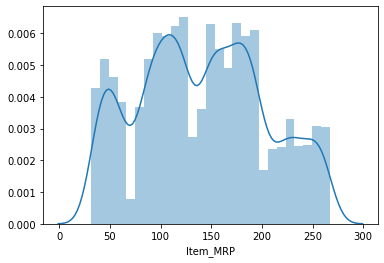

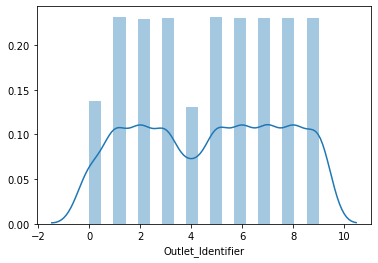

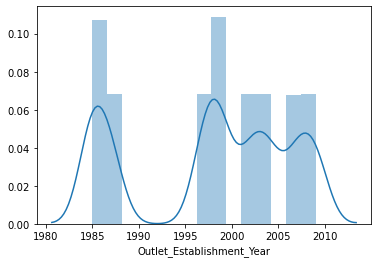

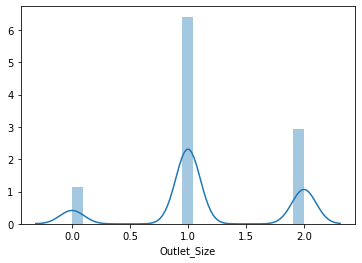

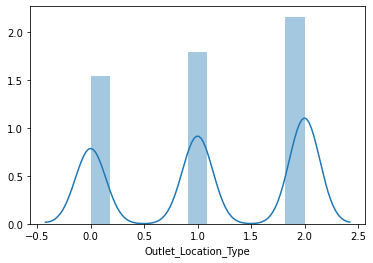

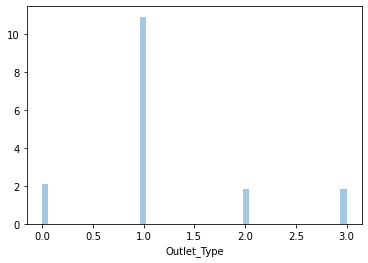

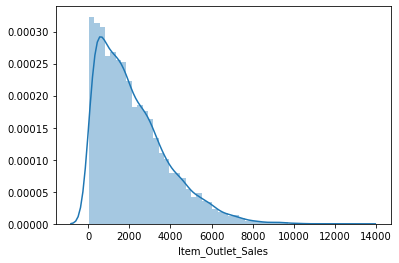

In [31]:
for j in bm.columns:
    plt.figure()
    sns.distplot(bm[j])

# Outliers in Dataset

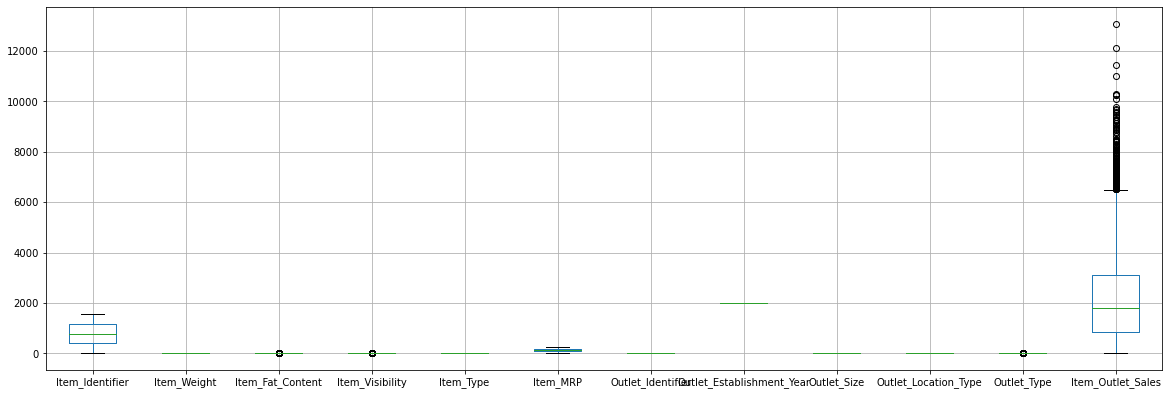

In [32]:
bm.iloc[:,0:12].boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.show()

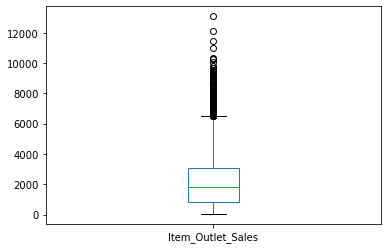

In [33]:
bm['Item_Outlet_Sales'].plot.box()

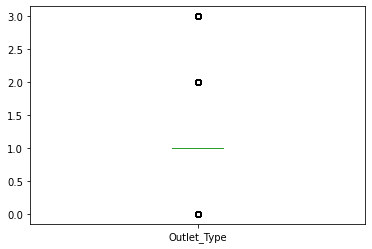

In [34]:
bm['Outlet_Type'].plot.box()

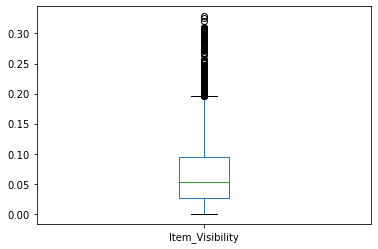

In [35]:
bm['Item_Visibility'].plot.box()

# Remove Outliers

In [36]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(bm))
z.shape

(8523, 12)

In [37]:
threshold=3
print(np.where(z>3))

(array([  49,   81,   83,  108,  130,  145,  151,  174,  199,  276,  304,
        333,  339,  373,  396,  434,  456,  472,  489,  502,  521,  532,
        615,  661,  694,  727,  753,  753,  809,  838,  854,  891,  935,
        991,  997, 1009, 1010, 1034, 1090, 1124, 1133, 1138, 1159, 1183,
       1209, 1254, 1272, 1291, 1311, 1324, 1372, 1433, 1434, 1450, 1496,
       1501, 1506, 1512, 1542, 1549, 1560, 1575, 1576, 1615, 1617, 1644,
       1651, 1684, 1723, 1753, 1769, 1805, 1827, 1841, 1859, 1998, 2062,
       2088, 2109, 2111, 2122, 2143, 2168, 2173, 2216, 2223, 2238, 2251,
       2293, 2324, 2331, 2438, 2439, 2445, 2516, 2535, 2552, 2569, 2586,
       2613, 2660, 2678, 2728, 2776, 2855, 2895, 2905, 2971, 2973, 3011,
       3017, 3083, 3087, 3098, 3154, 3206, 3225, 3234, 3241, 3242, 3243,
       3286, 3335, 3367, 3399, 3407, 3458, 3474, 3480, 3488, 3491, 3497,
       3509, 3540, 3545, 3582, 3602, 3667, 3709, 3720, 3750, 3757, 3767,
       3884, 3993, 4006, 4019, 4083, 4163, 4219, 4

In [38]:
bm_new=bm[(z<3).all(axis=1)]
print(bm.shape)
print(bm_new.shape)

(8523, 12)
(8222, 12)


# Show the Percentage Loss

In [39]:
loss=((8523-8222)/8523)*100
loss

3.5316203214830457

# Remove Skewness

In [40]:
from sklearn.preprocessing import power_transform
bm_new=power_transform(bm_new,method='yeo-johnson')

# Using MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
bm_new=mms.fit_transform(bm_new)

In [42]:
bm=pd.DataFrame(bm_new)
bm

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.190539,0.326639,0.390091,0.150585,0.332673,0.942234,1.000000,0.515863,0.492099,0.000000,0.467673,0.739800
1,0.020206,0.100295,0.713492,0.178377,0.945639,0.102690,0.388579,1.000000,0.492099,1.000000,0.770669,0.244706
2,0.541345,0.800237,0.390091,0.156785,0.718454,0.541185,1.000000,0.515863,0.492099,0.000000,0.467673,0.563566
3,0.789957,0.889814,0.713492,0.000000,0.469736,0.699677,0.000000,0.473265,0.492099,1.000000,0.000000,0.327666
4,0.876964,0.303063,0.390091,0.000000,0.658702,0.133937,0.143219,0.063920,0.000000,1.000000,0.467673,0.386754
...,...,...,...,...,...,...,...,...,...,...,...,...
8217,0.356142,0.166324,0.390091,0.449371,0.890391,0.818806,0.143219,0.063920,0.000000,1.000000,0.467673,0.644561
8218,0.673267,0.267534,0.713492,0.386846,0.000000,0.399162,0.808923,0.649669,0.492099,0.505586,0.467673,0.278150
8219,0.905833,0.407589,0.390091,0.304216,0.597479,0.293340,0.709450,0.744115,1.000000,0.505586,0.467673,0.425302
8220,0.552462,0.189841,0.713492,0.831824,0.890391,0.376731,0.388579,1.000000,0.492099,1.000000,0.770669,0.529550


# Data split in Features and Target Column

In [43]:
x=bm.iloc[:,:-1]
y=bm.iloc[:,-1]

# Choose Best Random State

In [44]:
from sklearn.linear_model import LinearRegression
maxAcc=0
maxRS=0
for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    pred=ln.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.597873295588606 on Random_state  1
Best Accuracy is  0.597873295588606 on Random_state  1
Best Accuracy is  0.597873295588606 on Random_state  1
Best Accuracy is  0.604747237863553 on Random_state  4
Best Accuracy is  0.604747237863553 on Random_state  4
Best Accuracy is  0.6152297643426892 on Random_state  6
Best Accuracy is  0.6152297643426892 on Random_state  6
Best Accuracy is  0.6152297643426892 on Random_state  6
Best Accuracy is  0.6152297643426892 on Random_state  6
Best Accuracy is  0.6152297643426892 on Random_state  6
Best Accuracy is  0.6173289886546407 on Random_state  11
Best Accuracy is  0.6173289886546407 on Random_state  11
Best Accuracy is  0.6173289886546407 on Random_state  11
Best Accuracy is  0.6173289886546407 on Random_state  11
Best Accuracy is  0.6173289886546407 on Random_state  11
Best Accuracy is  0.6173289886546407 on Random_state  11
Best Accuracy is  0.6173289886546407 on Random_state  11
Best Accuracy is  0.6173289886546407 on Random

Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy is  0.6261698634504502 on Random_state  151
Best Accuracy 

# Apply Linear Regression Model

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=151)
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('predicted price',pred)
print('actual price',y_test)

predicted price [0.46013302 0.61997897 0.58828617 ... 0.6072359  0.52534481 0.66697121]
actual price 1572    0.774058
1550    0.598372
6333    0.394069
4466    0.683565
3990    0.664683
          ...   
3419    0.327335
6296    0.559915
1407    0.784698
6420    0.547162
1128    0.583046
Name: 11, Length: 2467, dtype: float64


In [46]:
print('Error :-')
print('mean absolute error :-',mean_absolute_error(y_test,pred))
print('mean squared error :-',mean_squared_error(y_test,pred))
print('root mean squared error :-',np.sqrt(mean_squared_error(y_test,pred)))

Error :-
mean absolute error :- 0.10718668223260439
mean squared error :- 0.018127925936595474
root mean squared error :- 0.13463998639555588


In [47]:
from sklearn.metrics import r2_score
print('r2_score value :-',r2_score(y_test,pred))

r2_score value :- 0.6261698634504502


# cross validation

In [48]:
test_r2score=r2_score(y_test,pred)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(ln,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f" At cross fold {j} the cv score is {cv_mean} and r2 score for testing is {test_r2score}")
    print('\n')

 At cross fold 2 the cv score is 0.5980787169326796 and r2 score for testing is 0.6261698634504502


 At cross fold 3 the cv score is 0.5983954677743264 and r2 score for testing is 0.6261698634504502


 At cross fold 4 the cv score is 0.5977201784454157 and r2 score for testing is 0.6261698634504502


 At cross fold 5 the cv score is 0.5982190832618086 and r2 score for testing is 0.6261698634504502


 At cross fold 6 the cv score is 0.5985283132184769 and r2 score for testing is 0.6261698634504502


 At cross fold 7 the cv score is 0.5986616065520683 and r2 score for testing is 0.6261698634504502


 At cross fold 8 the cv score is 0.5981868558574412 and r2 score for testing is 0.6261698634504502


 At cross fold 9 the cv score is 0.5982407444703374 and r2 score for testing is 0.6261698634504502




since the no of fold don't have such impact on the accuracy and cv_score.CV=5 is selected.

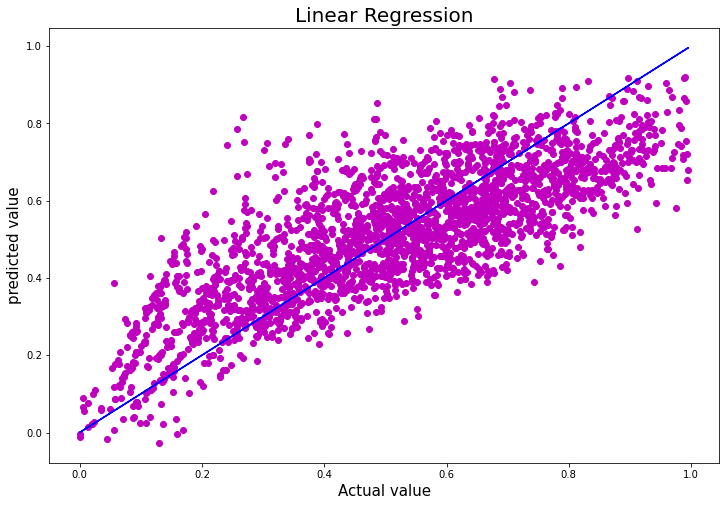

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=pred,color='m')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual value',fontsize=15)
plt.ylabel('predicted value',fontsize=15)
plt.title("Linear Regression",fontsize=20)
plt.show()

Best fit line covering most of the datapoint which shows good fit of our model.

# Regularization

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [51]:
from sklearn.linear_model import Lasso
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(1,20))}
lo=Lasso()
gs=GridSearchCV(lo,parameters)
gs.fit(x_train,y_train)
print(gs.best_params_)

{'alpha': 0.0001, 'random_state': 1}


In [52]:
lo=Lasso(alpha=0.0001,random_state=1)
lo.fit(x_train,y_train)
predlo=lo.predict(x_test)
r2=r2_score(y_test,predlo)

cv_score=cross_val_score(lo,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean
print(r2)
print(cv_mean)

0.6259552525147902
0.5982320537850374


In [54]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
r2=r2_score(y_test,predrf)

cv_score=cross_val_score(rf,x,y,cv=5)
cv_mean=cv_score.mean()

print(r2)
print(cv_mean)

0.662259242866472
0.6367725468627492


In [55]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
r2=r2_score(y_test,predad)

cv_score=cross_val_score(ad,x,y,cv=5)
cv_mean=cv_score.mean()

print(r2)
print(cv_mean)

0.6663595149810276
0.6410640792449561


# Save the Best Model

In [56]:
import joblib
joblib.dump(ad,'bigmart_sales_model.obj')

['bigmart_sales_model.obj']